In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import math
####
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset
df=pd.read_excel("FINAL DEMAND Dataset.xlsx")
df.head()

,Date,15/32,27/64,9/16,5/8 (1012),3/8,17/32,13/32,9/32 (1008),5/16 (1008),5/16 (1012),11/32,1/4 (1008),11/16,7/16,7/32
0,33-2020,31,23,0,0,0,0,0,0,0,0,0,0.0,0,0,0.000000
1,34-2020,22,16,0,0,0,0,0,0,0,0,0,0.0,0,0,0.000000
2,35-2020,53,39,0,0,0,0,0,0,0,0,0,0.0,0,0,0.000000
3,36-2020,15,8,8,19,4,0,0,0,0,0,0,0.0,0,0,148.192857
4,37-2020,0,2,0,0,0,0,0,0,0,0,0,0.0,0,0,148.378571


In [3]:
date = df["Date"]
dia1 = df["15/32"]
dia2 = df["27/64"]
dia3 = df["9/16"]
dia4 = df["5/8 (1012)"]
dia5 = df["3/8"]
dia6 = df["17/32"]
dia7 = df["13/32"]
dia8 = df["9/32 (1008)"]
dia9 = df["5/16 (1008)"]
dia10 = df["5/16 (1012)"]
dia11 = df["11/32"]
dia12 = df["1/4 (1008)"]
dia13 = df["11/16"]
dia14 = df["7/16"]
dia15 = df["7/32"]

# 15/32 (dia1)

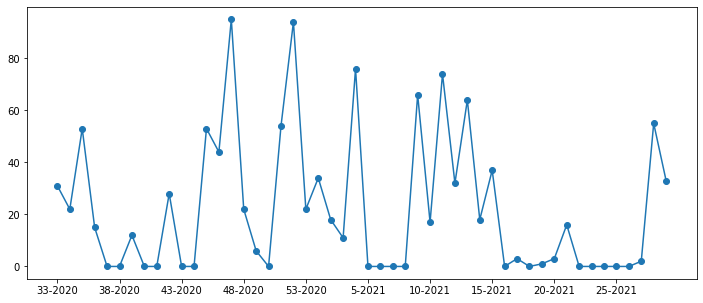

In [4]:
#plot 

plt.figure(figsize=(12,5))
plt.plot_date(date,dia1,linestyle='solid')
plt.xticks(date[::5])
plt.show()

In [5]:
def perform_test(dataset):
    result = adfuller(dataset)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [6]:
perform_test(dia1)

ADF Statistic: -2.627476
p-value: 0.087451


In [7]:
#dia1 is stationary, time to build the model
stepwise_fit1 = auto_arima(dia1,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=474.788, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=474.444, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=475.045, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=498.926, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=475.557, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=476.109, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=476.948, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=484.876, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.096 seconds


In [8]:
train1 = dia1[:40]
test1 = dia1[40:]
print(train1.shape,test1.shape)

(40,) (10,)


In [91]:
final1 = ARIMA(dia1,order=(1,0,0)).fit(disp=-1)
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  15/32   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                -234.222
Method:                       css-mle   S.D. of innovations             26.181
Date:                Mon, 02 Aug 2021   AIC                            474.444
Time:                        10:37:11   BIC                            480.180
Sample:                             0   HQIC                           476.628
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.3244      4.677      4.773      0.000      13.158      31.491
ar.L1.15/32     0.2124      0.137      1.551      0.121      -0.056       0.481
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7074           +0.0000j            4.7074            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
prediction1 = final1.predict(len(df),len(dia1)+3)

In [11]:
fc, se, conf = final1.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction1.index)
lower_series = pd.Series(conf[:, 0], index = prediction1.index)
upper_series = pd.Series(conf[:, 1],index = prediction1.index)

'The next month quantity amount needed for 15/32 wire size is 93.'

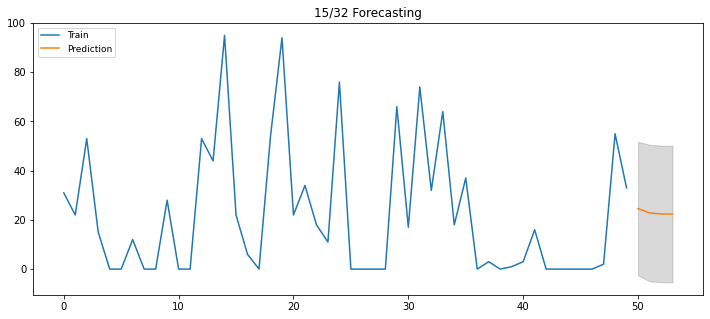

In [12]:
dia1.plot(legend=True,label='Train',figsize=(12,5))
prediction1.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('15/32 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result1 =math.ceil(sum(prediction1))
f"The next month quantity amount needed for 15/32 wire size is {result1}."


In [13]:
prediction1

50    24.592214
51    22.806122
52    22.426696
53    22.346094
dtype: float64

# 27/64 (dia2)

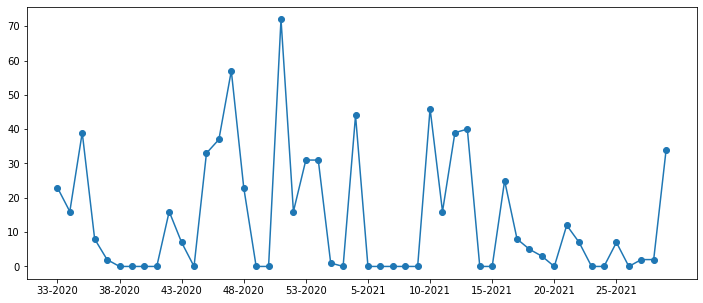

In [14]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia2,linestyle='solid')
plt.xticks(date[::5])
plt.show()

In [15]:
perform_test(dia2)

ADF Statistic: -2.726893
p-value: 0.069499


In [16]:
stepwise_fit2 = auto_arima(dia2,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=440.551, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=434.247, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=434.680, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=434.649, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=456.269, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=436.646, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.567 seconds


In [17]:
final2 = ARIMA(dia2,order=(1,0,0)).fit(disp=-1)
prediction2 = final2.predict(len(df),len(dia1)+3)

In [18]:
fc, se, conf = final2.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction2.index)
lower_series = pd.Series(conf[:, 0], index = prediction2.index)
upper_series = pd.Series(conf[:, 1],index = prediction2.index)

'The next month quantity amount needed for 27/64 wire size is 61.'

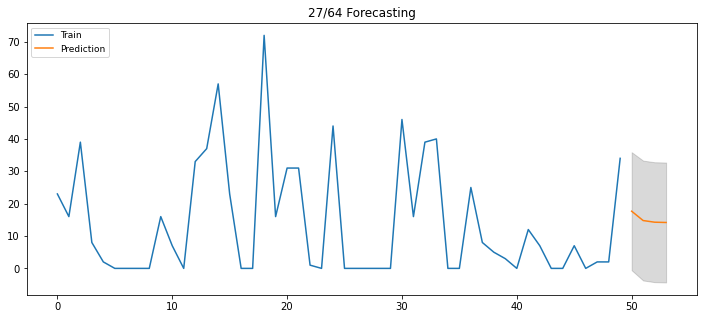

In [19]:
dia2.plot(legend=True,label='Train',figsize=(12,5))
prediction2.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('27/64 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result2 =math.ceil(sum(prediction2))
f"The next month quantity amount needed for 27/64 wire size is {result2}."

In [53]:
prediction2

50    17.666282
51    14.781696
52    14.272269
53    14.182303
dtype: float64

# 9/16 (dia3)

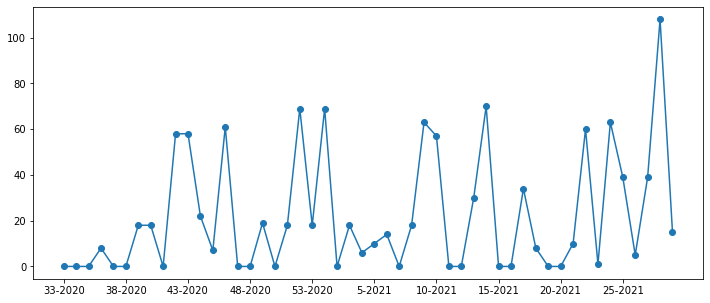

ADF Statistic: -6.664073
p-value: 0.000000
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=478.371, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=473.991, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=475.931, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=475.913, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=498.455, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=477.616, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.687 seconds


In [21]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia3,linestyle='solid')
plt.xticks(date[::5])
plt.show()

perform_test(dia3)
stepwise_fit3 = auto_arima(dia3,trace=True,suppress_warnings=True)

In [22]:
final3 = ARIMA(dia3,order=(1,0,0)).fit(disp=-1)
prediction3 = final3.predict(len(df),len(dia3)+3)


In [54]:
fc, se, conf = final3.forecast(4,alpha=.5)
fc_series = pd.Series(fc,index = prediction3.index)
lower_series = pd.Series(conf[:, 0], index = prediction3.index)
upper_series = pd.Series(conf[:, 1],index = prediction3.index)

'The next month quantity amount needed for 9/16 wire size is 89.'

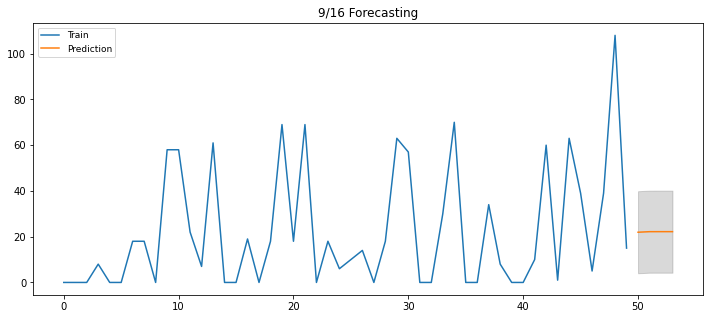

In [55]:
dia3.plot(legend=True,label='Train',figsize=(12,5))
prediction3.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('9/16 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result3 =math.ceil(sum(prediction3))
f"The next month quantity amount needed for 9/16 wire size is {result3}."


In [56]:
prediction3

50    21.949427
51    22.190254
52    22.198599
53    22.198889
dtype: float64

# 5/8 (1012) (dia4)

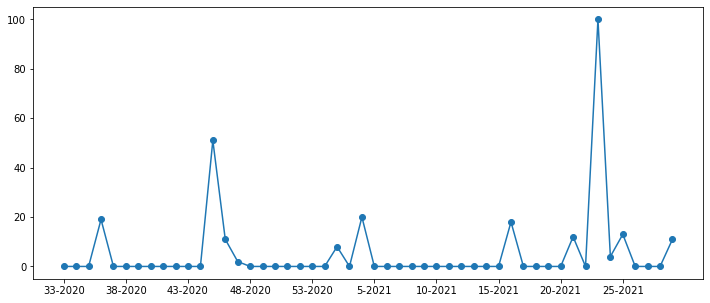

ADF Statistic: -7.061562
p-value: 0.000000
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=423.456, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=425.412, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=425.419, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=426.781, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=427.075, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.224 seconds


In [58]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia4,linestyle='solid')
plt.xticks(date[::5])
plt.show()

perform_test(dia4)
stepwise_fit4 = auto_arima(dia4,trace=True,suppress_warnings=True)

In [59]:
final4 = ARIMA(dia4,order=(1,0,1)).fit(disp=-1)
prediction4 = final4.predict(len(df),len(dia4)+3)


In [60]:
fc, se, conf = final4.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction4.index)
lower_series = pd.Series(conf[:, 0], index = prediction4.index)
upper_series = pd.Series(conf[:, 1],index = prediction4.index)

'The next month quantity amount needed for 9/16 wire size is 22.'

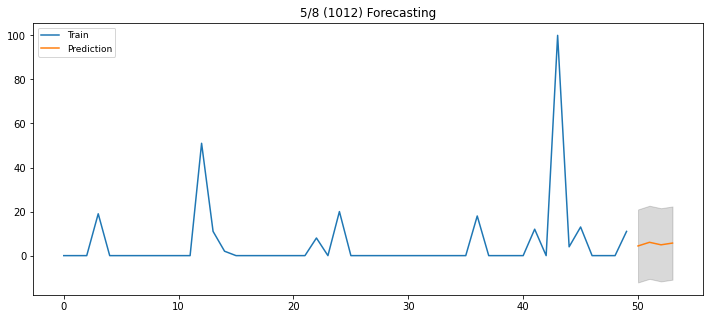

In [61]:
dia4.plot(legend=True,label='Train',figsize=(12,5))
prediction4.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('5/8 (1012) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result4 =math.ceil(sum(prediction4))
f"The next month quantity amount needed for 9/16 wire size is {result4}."

In [62]:
prediction4

50    4.392654
51    6.051525
52    4.906817
53    5.696725
dtype: float64

# 3/8 (dia5)

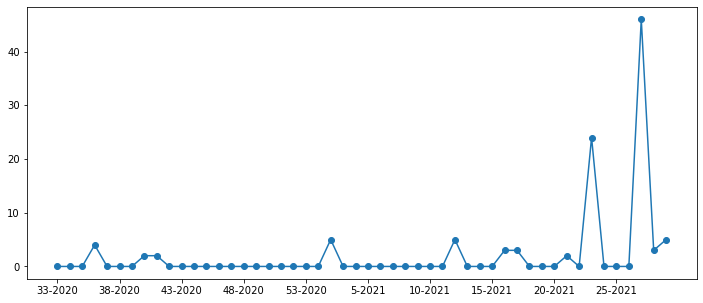

ADF Statistic: 2.456360
p-value: 0.999034
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=372.429, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=359.156, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=370.434, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=351.503, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=312.857, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=314.814, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=314.797, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=338.237, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=316.721, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=312.663, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=349.853, Time=0.01 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=314.663, Time=0.05 sec
 ARIMA(3,1,1)

In [63]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia5,linestyle='solid')
plt.xticks(date[::5])
plt.show()

perform_test(dia5)
stepwise_fit4 = auto_arima(dia5,trace=True,suppress_warnings=True)

In [64]:
final5 = ARIMA(dia5,order=(2,0,0)).fit(disp=-1)
prediction5 = final5.predict(len(df),len(dia5)+3)


In [65]:
fc, se, conf = final5.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction5.index)
lower_series = pd.Series(conf[:, 0], index = prediction5.index)
upper_series = pd.Series(conf[:, 1],index = prediction5.index)

'The next month quantity amount needed for 3/8 wire size is 9.'

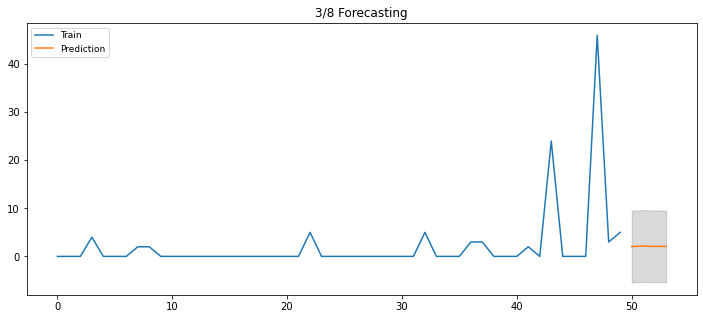

In [66]:
dia5.plot(legend=True,label='Train',figsize=(12,5))
prediction5.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('3/8 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result5 =math.ceil(sum(prediction5))
f"The next month quantity amount needed for 3/8 wire size is {result5}."

In [67]:
prediction5

50    2.055735
51    2.154613
52    2.077736
53    2.081510
dtype: float64

# 17/32 (dia6)

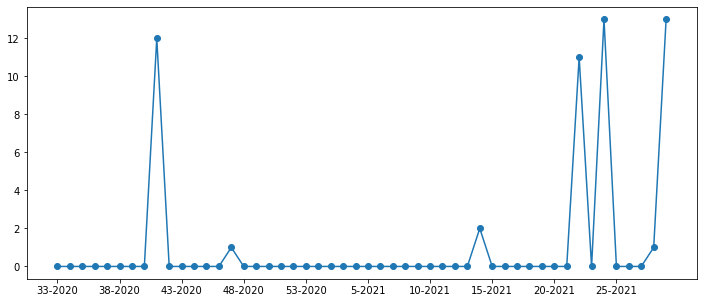

ADF Statistic: -1.855705
p-value: 0.353177
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=268.736, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.044, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=267.842, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=267.906, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.884, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.224, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.135 seconds


In [68]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia6,linestyle='solid')
plt.xticks(date[::5])
plt.show()


perform_test(dia6)
stepwise_fit6 = auto_arima(dia6,trace=True,suppress_warnings=True)

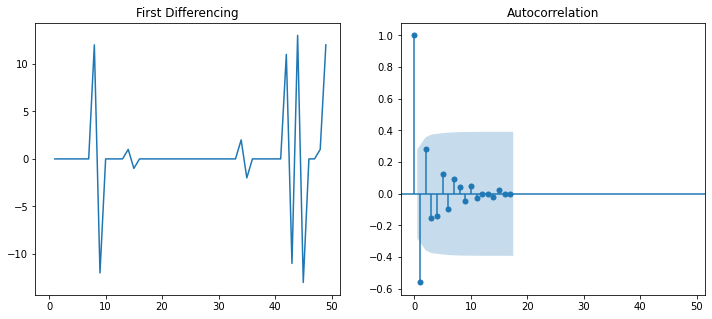

In [69]:
#first order differencing to get data stationary

fig, axes = plt.subplots(1, 2, sharex=True,figsize=(12,5))
axes[0].plot(dia6.diff()); axes[0].set_title('First Differencing')
plot_acf(dia6.diff().dropna(),ax=axes[1])

plt.show()

In [75]:
final6 = ARIMA(dia6,order=(1,0,1)).fit(disp=-1)
prediction6 = final6.predict(len(df),len(dia5)+3)
prediction6
fc, se, conf = final6.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction6.index)
lower_series = pd.Series(conf[:, 0], index = prediction6.index)
upper_series = pd.Series(conf[:, 1],index = prediction6.index)

'The next month quantity amount needed for 17/32 wire size is 4.'

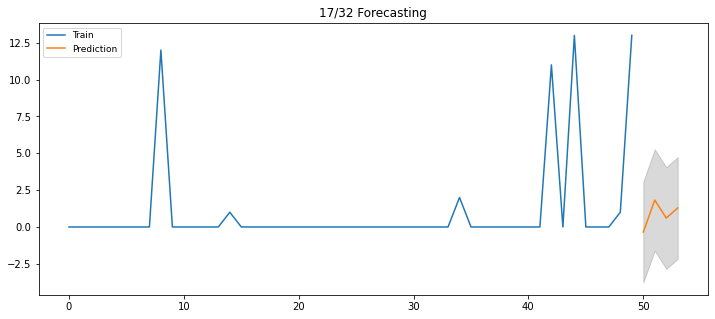

In [76]:
dia6.plot(legend=True,label='Train',figsize=(12,5))
prediction6.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('17/32 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result6 =math.ceil(sum(prediction6))
f"The next month quantity amount needed for 17/32 wire size is {result6}."

In [72]:
prediction6

50   -0.346833
51    1.825119
52    0.603576
53    1.290593
dtype: float64

# 13/32 (dia 7)

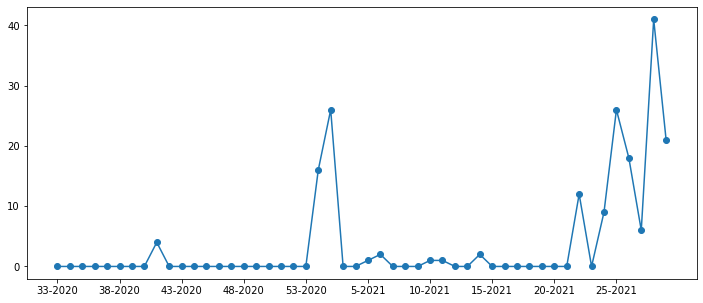

ADF Statistic: -0.419961
p-value: 0.906712
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=338.003, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=353.083, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=345.876, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=338.348, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=351.206, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=341.562, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=336.074, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=340.336, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=334.143, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=336.066, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=338.065, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=333.215, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=344.388, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=335.035, Time=0.02 sec
 ARI

In [77]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia7,linestyle='solid')
plt.xticks(date[::5])
plt.show()


perform_test(dia7)
stepwise_fit6 = auto_arima(dia7,trace=True,suppress_warnings=True)

In [78]:
final7 = ARIMA(dia7,order=(1,0,0)).fit(disp=-1)
prediction7 = final7.predict(len(df),len(dia7)+3)
prediction7
fc, se, conf = final7.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index = prediction7.index)
lower_series = pd.Series(conf[:, 0], index = prediction7.index)
upper_series = pd.Series(conf[:, 1],index = prediction7.index)

'The next month quantity amount needed for 13/32 wire size is 32.'

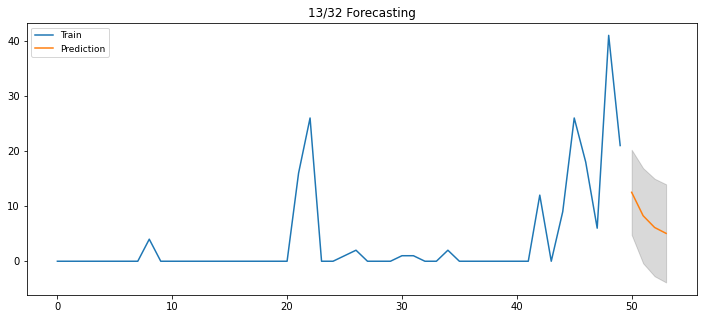

In [79]:
dia7.plot(legend=True,label='Train',figsize=(12,5))
prediction7.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('13/32 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result7 =math.ceil(sum(prediction7))
f"The next month quantity amount needed for 13/32 wire size is {result7}."

In [80]:
prediction7

50    12.511859
51     8.257387
52     6.124937
53     5.056099
dtype: float64

# 9/32 (1008) (dia8)

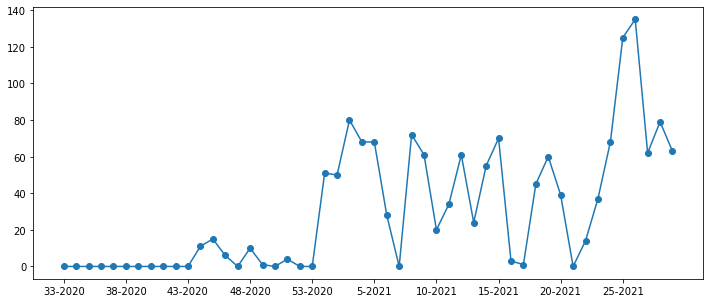

ADF Statistic: -2.924224
p-value: 0.042603
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=466.981, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=468.658, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=467.454, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=465.090, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.267 seconds


In [81]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia8,linestyle='solid')
plt.xticks(date[::5])
plt.show()


perform_test(dia8)
stepwise_fit8 = auto_arima(dia8,trace=True,suppress_warnings=True)

In [82]:
final8=ARIMA(dia8,order = (1,0,0)).fit()
prediction8 = final8.predict(len(df),len(df)+3)

fc,se,conf = final8.forecast(4,alpha=.4)
fc_series =  pd.Series(fc,index = prediction8.index)
lower_series = pd.Series(conf[:,0],index = prediction8.index)
upper_series = pd.Series(conf[:,1],index = prediction8.index)



'The next month quantity amount needed for 9/32 (1008) wire size is 178.'

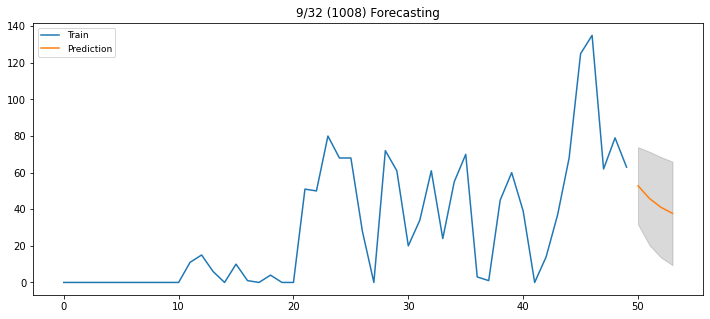

In [83]:
dia8.plot(legend=True,label='Train',figsize=(12,5))
prediction8.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('9/32 (1008) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result8 =math.ceil(sum(prediction8))
f"The next month quantity amount needed for 9/32 (1008) wire size is {result8}."

In [84]:
prediction8

50    52.831934
51    45.843976
52    41.041534
53    37.741076
dtype: float64

# 5/16 (1008) (dia9)

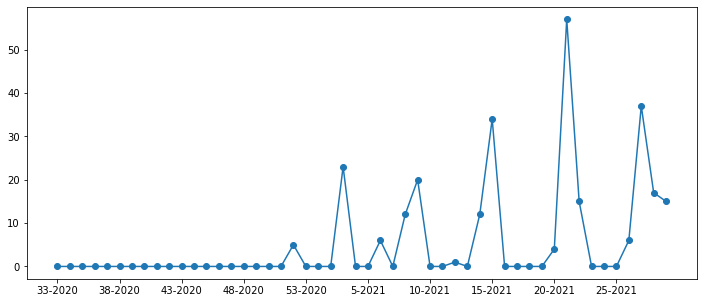

ADF Statistic: -0.218722
p-value: 0.936253
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=368.220, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=402.596, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=399.831, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=400.618, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] interce

In [92]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia9,linestyle="solid")
plt.xticks(date[::5])
plt.show()


perform_test(dia9)
stepwise_fit9 = auto_arima(dia9,trace=True,suppress_warnings=True)

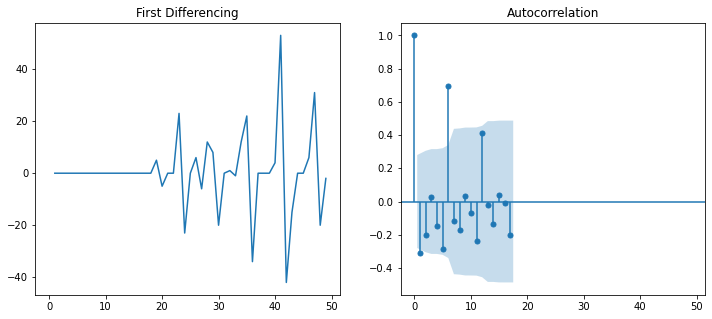

In [93]:
#test shows non-stationary, differencing is needed

fig, axes = plt.subplots(1, 2, sharex=True,figsize=(12,5))
axes[0].plot(dia9.diff()); axes[0].set_title('First Differencing')
plot_acf(dia9.diff().dropna(),ax=axes[1])

plt.show()

In [94]:
final9 = ARIMA(dia9,order = (2,0,0)).fit()
prediction9 = final9.predict(len(df),len(df)+3)

fc,se,conf = final9.forecast(4,alpha=.4)
fc_series =  pd.Series(fc,index = prediction9.index)
lower_series = pd.Series(conf[:,0],index = prediction9.index)
upper_series = pd.Series(conf[:,1],index = prediction9.index)





'The next month quantity amount needed for 5/16 (1008) wire size is 21.'

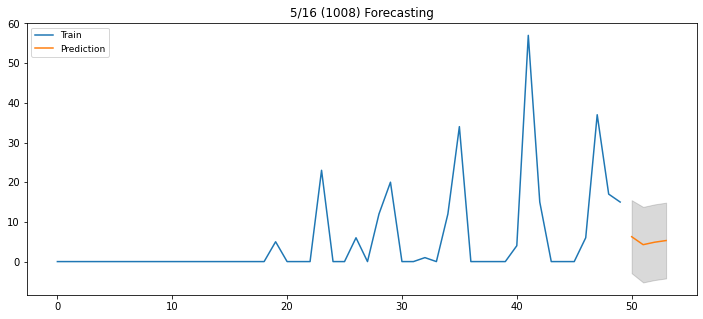

In [95]:
dia9.plot(legend=True,label='Train',figsize=(12,5))
prediction9.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('5/16 (1008) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result9 =math.ceil(sum(prediction9))
f"The next month quantity amount needed for 5/16 (1008) wire size is {result9}."

In [96]:
prediction9

50    6.270192
51    4.261522
52    4.880352
53    5.303849
dtype: float64

# 5/16 (1012) (dia10)

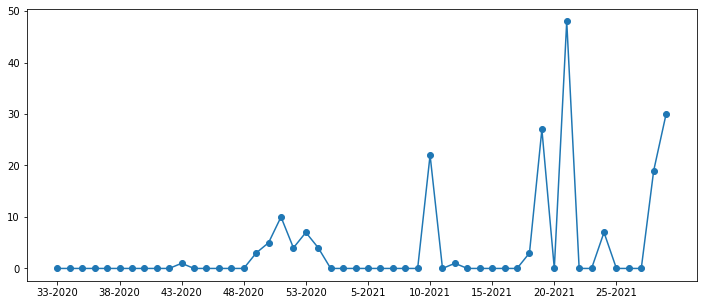

In [97]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia10,linestyle='solid')
plt.xticks(date[::5])
plt.show()

In [98]:
perform_test(dia10)
stepwise_fit10 = auto_arima(dia1,trace=True,suppress_warnings=True)

ADF Statistic: 2.466670
p-value: 0.999038
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=474.788, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=474.444, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=475.045, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=498.926, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=475.557, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=476.109, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=476.948, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=484.876, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.363 seconds


In [99]:
final10 = ARIMA(dia10,order=(2,0,0)).fit()
prediction10 = final10.predict(start=len(dia10),end=len(dia10)+3)

fc,se,conf = final10.forecast(4,alpha=.4)
fc_series =  pd.Series(fc,index = prediction10.index)
lower_series = pd.Series(conf[:,0],index = prediction10.index)
upper_series = pd.Series(conf[:,1],index = prediction10.index)

'The next month quantity amount needed for 5/16 (1012) wire size is 33.'

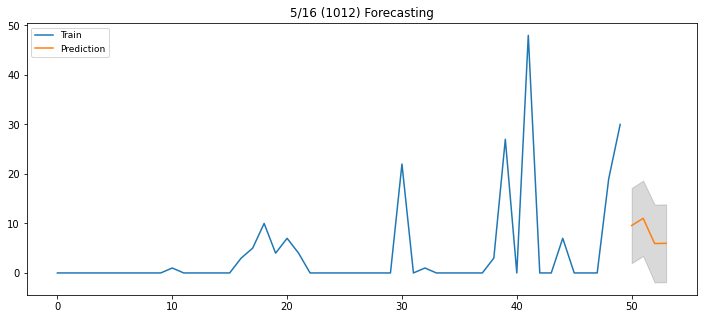

In [100]:
dia10.plot(legend=True,label='Train',figsize=(12,5))
prediction10.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('5/16 (1012) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result10 =math.ceil(sum(prediction10))
f"The next month quantity amount needed for 5/16 (1012) wire size is {result10}."

In [101]:
prediction10

50     9.572338
51    11.040764
52     5.944832
53     5.986963
dtype: float64

# 11/32 (dia11)

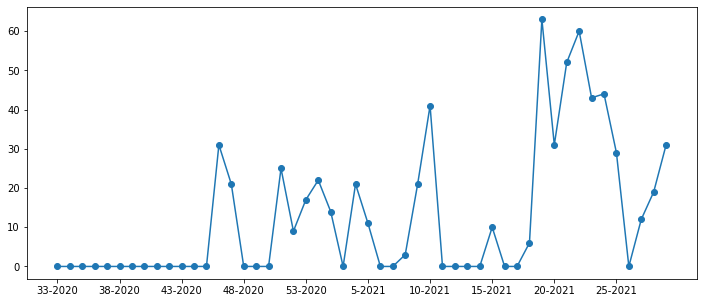

In [102]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia11,linestyle='solid')
plt.xticks(date[::5])
plt.show()

In [103]:
perform_test(dia11)
stepwise_fit11 = auto_arima(dia11,trace=True,suppress_warnings=True)

ADF Statistic: -3.482967
p-value: 0.008435
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=414.579, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=413.009, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=410.974, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=412.656, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=409.150, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=406.978, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=411.122, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=408.945, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=408.945, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=408.527, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)

In [104]:
final11=ARIMA(dia11,order=(1,0,1)).fit()
prediction11 = final11.predict(start=len(dia11),end=len(dia11)+3)

fc,se,conf = final10.forecast(4,alpha=.4)
fc_series =  pd.Series(fc,index = prediction11.index)
lower_series = pd.Series(conf[:,0],index = prediction11.index)
upper_series = pd.Series(conf[:,1],index = prediction11.index)

'The next month quantity amount needed for 5/16 (1012) wire size is 76.'

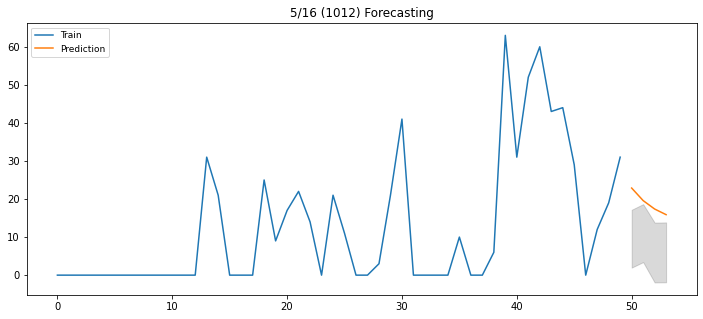

In [105]:
dia11.plot(legend=True,label='Train',figsize=(12,5))
prediction11.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('5/16 (1012) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result11 =math.ceil(sum(prediction11))
f"The next month quantity amount needed for 5/16 (1012) wire size is {result11}."

In [106]:
prediction11

50    22.884377
51    19.588669
52    17.375252
53    15.888707
dtype: float64

# 1/4 (1008) (dia12)

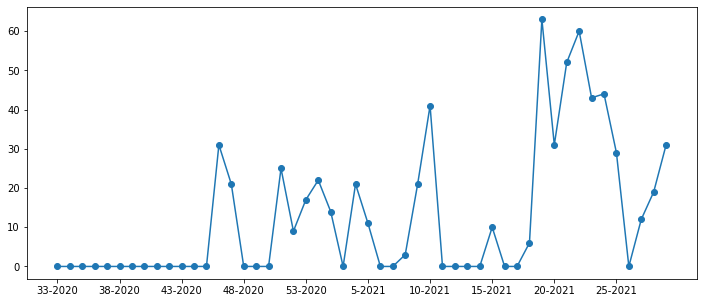

In [107]:
#plot raw data
plt.figure(figsize=(12,5))
plt.plot_date(date,dia11,linestyle='solid')
plt.xticks(date[::5])
plt.show()

In [108]:
#Augmented Dickey-Fuller Test
perform_test(dia12)

ADF Statistic: -2.502353
p-value: 0.114903


In [109]:
#Not doing train/test split due to lack of data for an accurate forecast
stepwise12 = auto_arima(dia12,trace=True ,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=494.022, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=534.844, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=492.800, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=513.758, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=545.247, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=494.267, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=494.478, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=494.819, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=492.413, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=493.600, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=493.886, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=520.357, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=494.199, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.392 seconds


In [110]:
final12 = ARIMA(dia12,order = (1,0,0)).fit()
prediction12 = final12.predict(start = len(df),end=len(df)+3)

In [111]:
fc,se,conf = final12.forecast(4,alpha=.4)
fc_series = pd.Series(fc,index = prediction12.index)
lower_series = pd.Series(conf[:,0],index = prediction12.index)
upper_series = pd.Series(conf[:,1],index = prediction12.index)

'The next month quantity amount needed for 1/4 (1008) wire size is 106.'

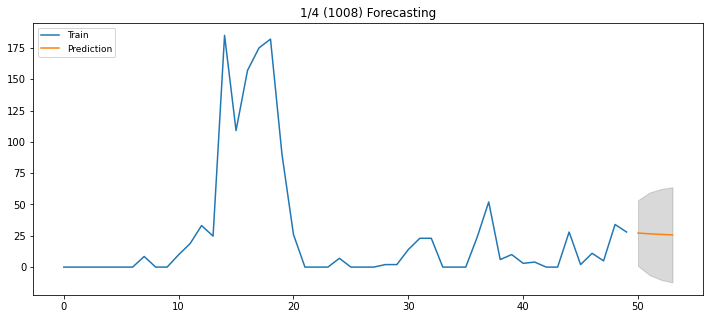

In [112]:
dia12.plot(legend=True,label='Train',figsize=(12,5))
prediction12.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('1/4 (1008) Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result12 =math.ceil(sum(prediction12))
f"The next month quantity amount needed for 1/4 (1008) wire size is {result12}."

In [113]:
prediction12

50    27.178780
51    26.556643
52    26.085327
53    25.728269
dtype: float64

# 11/16 (dia13)

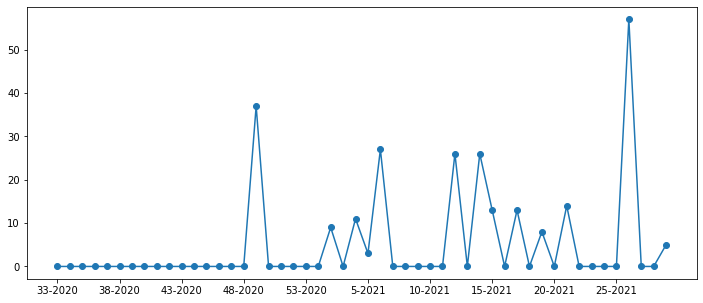

In [114]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia13,linestyle = "solid")
plt.xticks(date[::5])
plt.show()

In [115]:
perform_test(dia13)
stepwise13=auto_arima(dia13,trace=True,supress_warnings=True)

ADF Statistic: -7.791139
p-value: 0.000000
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=387.652, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=388.875, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=388.898, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=394.645, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=390.858, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.270 seconds


In [116]:
final13 = ARIMA(dia13,order=(1,0,0)).fit()
prediction13 = final13.predict(start=len(dia13),end=len(dia13)+3)

fc,se,conf = final13.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index=prediction13.index)
upper_series = pd.Series(conf[:,1],index=prediction13.index)
lower_series = pd.Series(conf[:,0],index= prediction13.index)

'The next month quantity amount needed for 1/4 (1008) wire size is 20.'

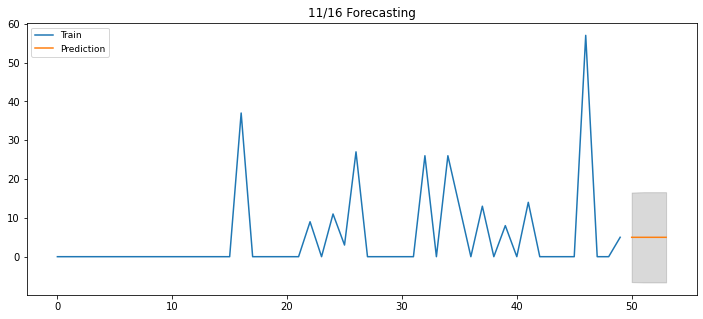

In [117]:
dia13.plot(legend=True,label='Train',figsize=(12,5))
prediction13.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('11/16 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result13 =math.ceil(sum(prediction13))
f"The next month quantity amount needed for 1/4 (1008) wire size is {result13}."

In [118]:
prediction13

50    4.989815
51    4.991070
52    4.990916
53    4.990935
dtype: float64

# 7/16 (dia14)

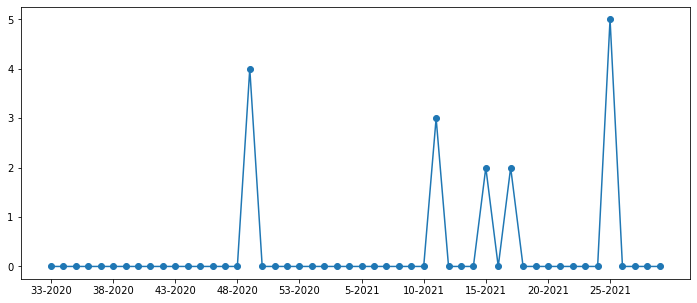

In [25]:
plt.figure(figsize=(12,5))
plt.plot_date(date,dia14,linestyle="solid")
plt.xticks(date[::5])
plt.show()

In [119]:
perform_test(dia14)
stepwise14=auto_arima(dia14,trace=True,supress_warnings=True)

ADF Statistic: -7.571519
p-value: 0.000000
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=148.694, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150.212, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150.168, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=151.315, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=151.492, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.204 seconds


In [120]:
final14= ARIMA(dia14,order=(1,0,0)).fit()
prediction14 = final14.predict(start=len(dia14),end=len(dia14)+3)

fc,se,conf = final14.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index=prediction14.index)
upper_series = pd.Series(conf[:,1],index=prediction14.index)
lower_series = pd.Series(conf[:,0],index= prediction14.index)

'The next month quantity amount needed for 7/16 wire size is 2.'

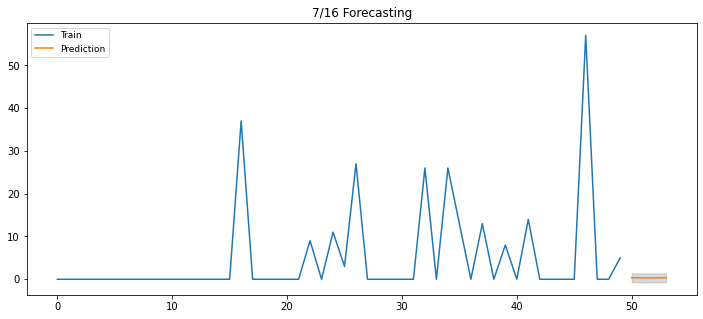

In [121]:
dia13.plot(legend=True,label='Train',figsize=(12,5))
prediction14.plot(legend=True,label='Prediction')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('7/16 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show

result14 =math.ceil(sum(prediction14))
f"The next month quantity amount needed for 7/16 wire size is {result14}."

In [122]:
prediction14


50    0.352355
51    0.318104
52    0.321433
53    0.321109
dtype: float64

# 7/32 (dia15)

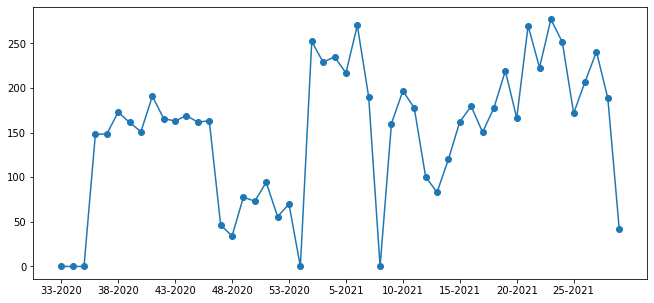

In [41]:
plt.figure(figsize=(11,5))
plt.plot_date(date,dia15,linestyle="solid")
plt.xticks(date[::5])
plt.show()

In [42]:
perform_test(dia15)

ADF Statistic: -3.789211
p-value: 0.003020


In [43]:
stepwise15=auto_arima(dia15,trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=570.477, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=581.286, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=564.512, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=569.200, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=655.844, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=566.506, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=566.506, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=568.511, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=571.220, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.344 seconds


In [47]:
final15=ARIMA(dia15,order=(1,0,0)).fit()

In [48]:
prediction15 = final15.predict(start=len(dia15),end=len(dia15)+3)

In [51]:
fc,se,conf = final15.forecast(4,alpha=.3)
fc_series = pd.Series(fc,index=prediction15.index)
lower_series = pd.Series(conf[:,0],index=prediction15.index)
upper_series = pd.Series(conf[:,1],index=prediction15.index)

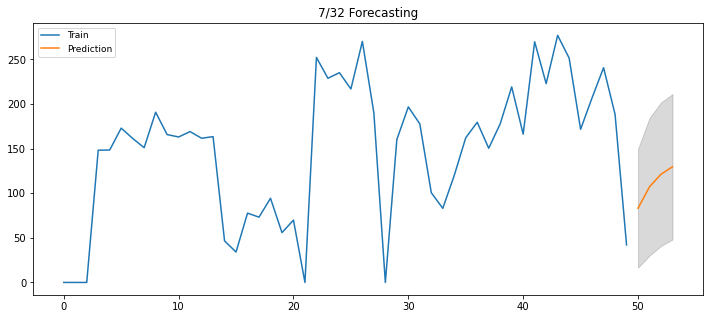

'The next month quantity amount needed for 7/16 wire size is 442.'

In [52]:
dia15.plot(legend=True,label='Train',figsize=(12,5))
prediction15.plot(legend=True,label='Prediction')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.title('7/32 Forecasting')
plt.legend(loc='upper left',fontsize=9)
plt.show()

result15 =math.ceil(sum(prediction15))
f"The next month quantity amount needed for 7/16 wire size is {result15}."

In [123]:
prediction15

50     83.149541
51    107.207075
52    121.304620
53    129.565683
dtype: float64